In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import holoviews as hv
import hvplot.pandas
hvplot.extension('plotly')

pio.renderers.default = "png" # For GitHub rendering

# Issuance Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an issuance sweep run that compares two parameter sets. 


## Part 1. Running the Simulation

In [2]:
sim_df = pd.read_pickle("../data/simulations/issuance_sweep-2023-12-21_22-37-28.pkl.gz")

In [3]:
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

In [4]:
sim_df['block_reward'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,701.0,2.735816e+01,7.311766e-01,13.698630,27.397247,27.397247,2.739725e+01,2.739725e+01
mock-issuance-function,701.0,1.881383e+06,2.993925e+06,11620.107598,67460.739086,391644.507553,2.273699e+06,1.320000e+07
mock-issuance-function-2,701.0,1.883024e+06,4.985571e+07,0.000000,0.000000,0.000000,0.000000e+00,1.320000e+09


In [5]:
sim_df['block_utilization'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,702.0,0.000002,6.825551e-08,0.0,0.000002,0.000002,0.000002,0.000002
mock-issuance-function,702.0,0.000002,6.825551e-08,0.0,0.000002,0.000002,0.000002,0.000002
mock-issuance-function-2,702.0,0.000002,6.825551e-08,0.0,0.000002,0.000002,0.000002,0.000002


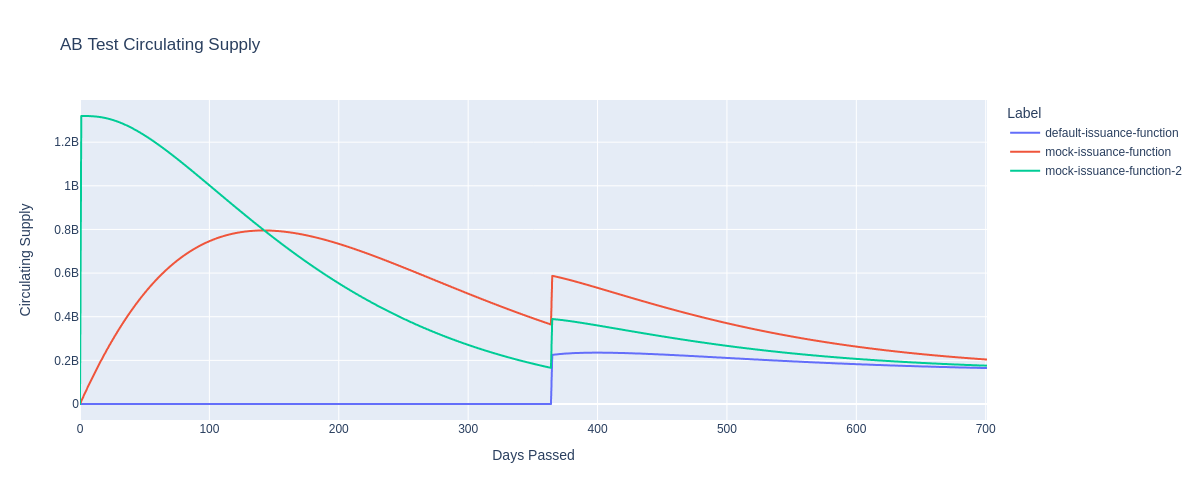

In [6]:
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values('days_passed'),
    y="circulating_supply",
    title="AB Test Circulating Supply",
    color=sim_df.index.get_level_values('label'),
    labels={
        "circulating_supply": "Circulating Supply",
        "x": "Days Passed",
        "color": "Label"
    }
)
fig.update_layout(width=1200, height=500)
fig.show()

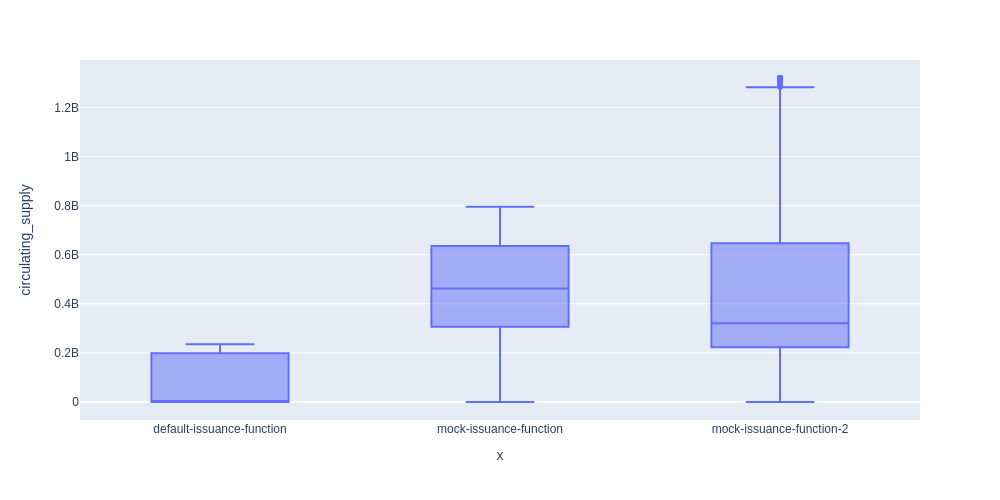

In [7]:
# box plot
fig = px.box(
    sim_df,
    x=sim_df.index.get_level_values('label'),
    y="circulating_supply",)
fig.update_layout(width=1000, height=500)
fig.show()

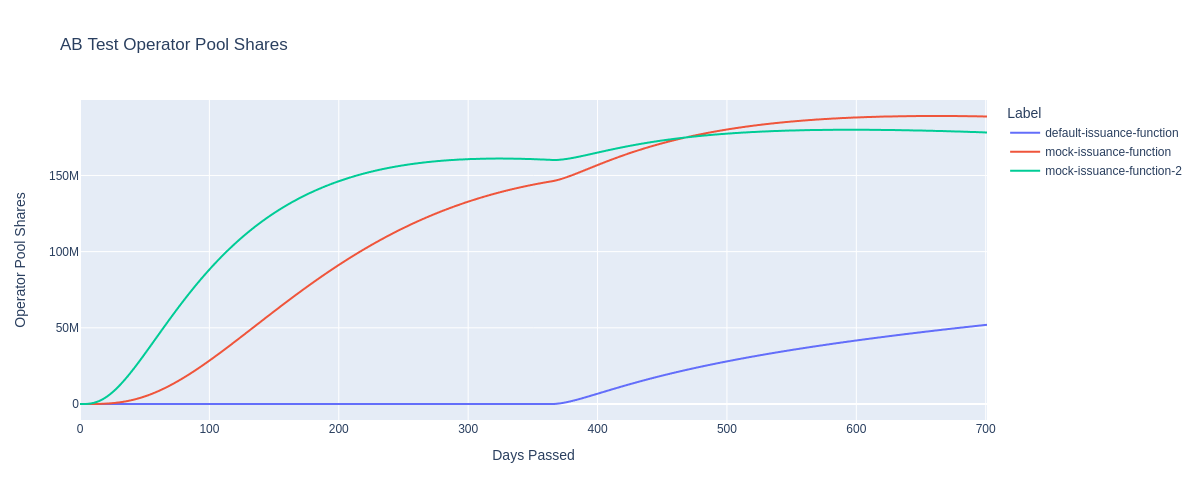

In [8]:
# sns.lineplot(sim_df, x="days_passed", y="operator_pool_shares", hue="label").set(
#     title="AB Test Operator Pool Shares"
# )
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="operator_pool_shares",
    title="AB Test Operator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "operator_pool_shares": "Operator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

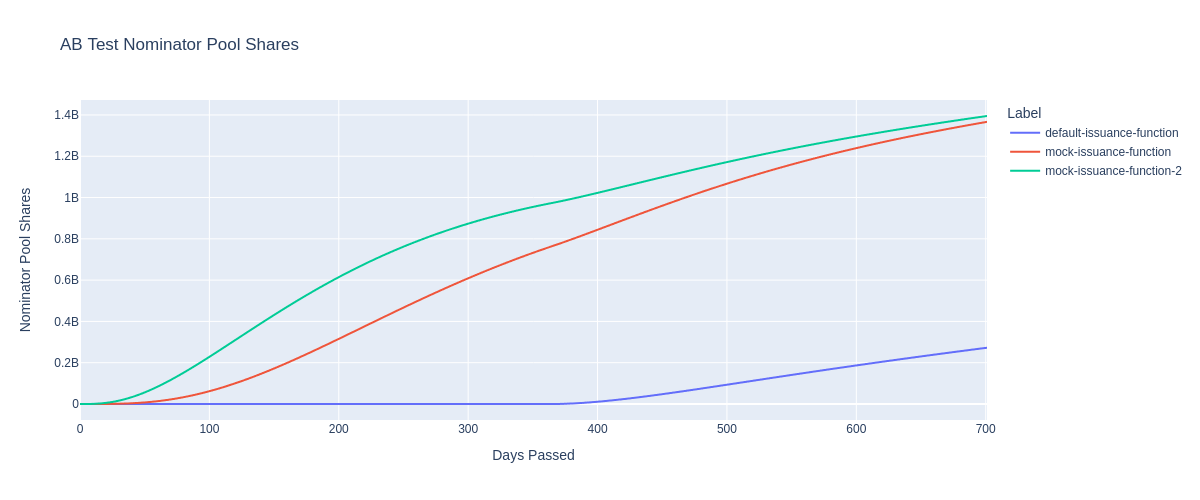

In [9]:
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="nominator_pool_shares",
    title="AB Test Nominator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "nominator_pool_shares": "Nominator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

In [10]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()


2023-12-21 23:01:57 - subspace-digital-twin - INFO
------------subspace-digital-twin------------


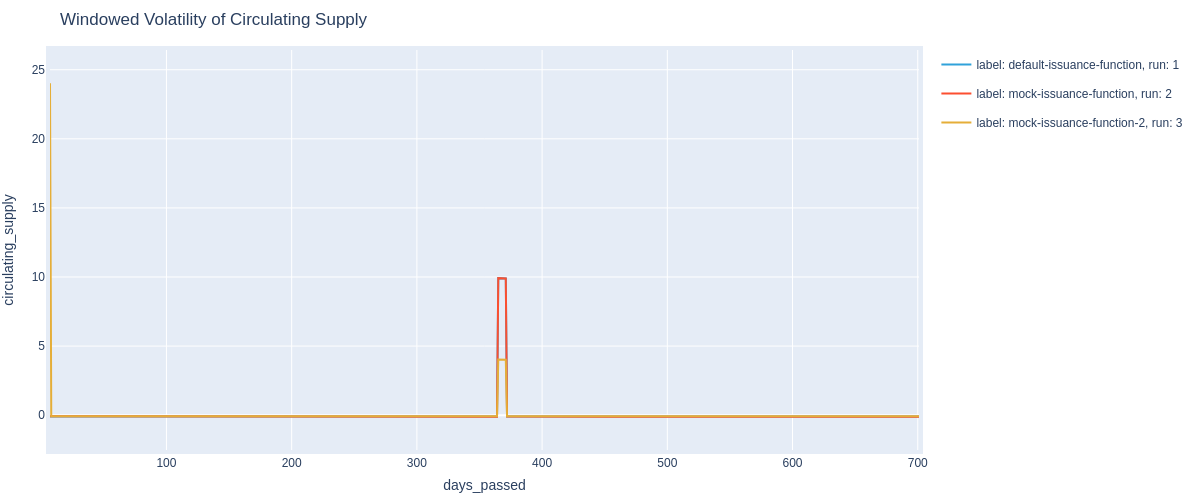

In [11]:
chart = df.hvplot.line(x='days_passed', y='circulating_supply', by=['label', 'run'], title='Windowed Volatility of Circulating Supply', width=1200, height=500)
pio.show(hv.render(chart, backend='plotly'))